In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)
import joblib

In [2]:
df = pd.read_csv('/media/abhishek/589E61B39E618A783/C-DAC Document/Practical Machine Learning/PML/Code/Dataset/credit.csv')

In [3]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,4,unknown/none,35,none,for free,1,unskilled resident,2,yes,yes,1
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,4,building society savings,53,none,own,1,skilled employee,1,none,yes,1
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,2,other,35,none,rent,1,mangement self-employed,1,yes,yes,1
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,1
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,2,other,28,none,own,2,mangement self-employed,1,none,yes,2


In [4]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
job                     object
dependents               int64
telephone               object
foreign_worker          object
default                  int64
dtype: object

In [5]:
df.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
df.isnull()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## How correlation help in feature selection ?
Features with high coor. are more linearly dependent and hence have almost the same effect on the dependent variables.
So, when two features have high coorelation we can drop one of the two features

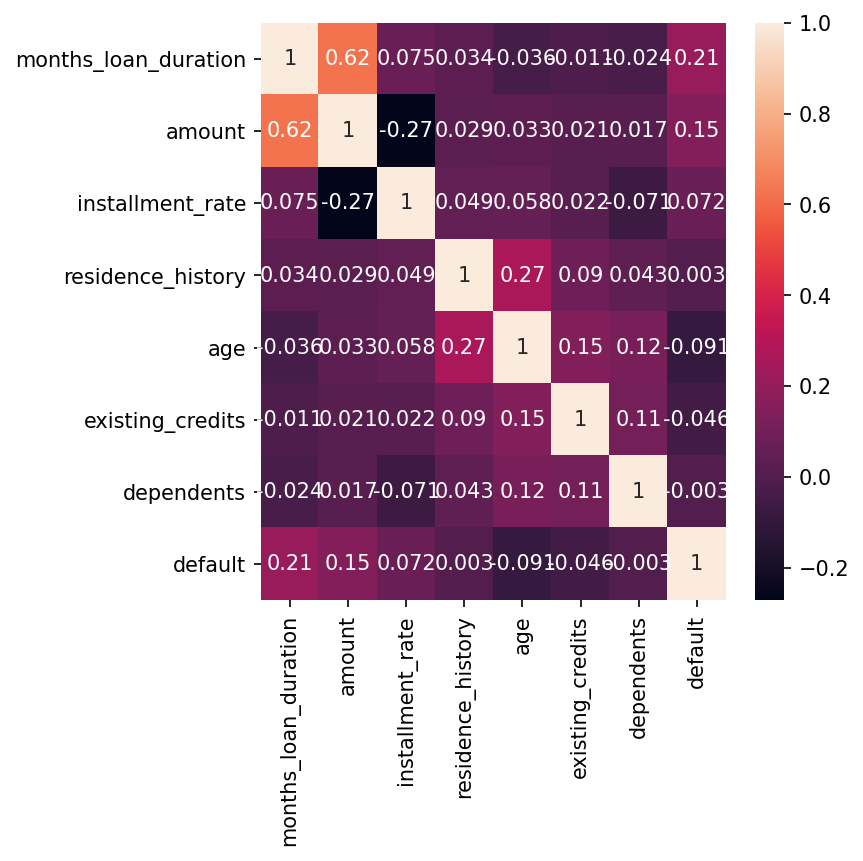

In [7]:
fig = plt.figure(figsize = (5, 5), dpi = 150)
sns.heatmap(df.corr(), annot = True)
plt.show()

## Data Preparation

### Find out the columns which are strings and cateogrical :
#### ~> Checking unique values in each columns to find the categorical columns.
#### ~> The description of data tells us which columns are categorical and which are continous
#### ~> Checking uniques values in each columns, just to find the categorical columns.
#### ~> Generally it is given the description of data which columns are categorical and which are continuous

In [8]:
df.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                  10
amount                  921
savings_balance           5
employment_length         5
installment_rate          4
personal_status           4
other_debtors             3
residence_history         4
property                  4
age                      53
installment_plan          3
housing                   3
existing_credits          4
job                       4
dependents                2
telephone                 2
foreign_worker            2
default                   2
dtype: int64

## Exploring the data

In [9]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


## LabelEncoder is used  for converting categorical string columns to numeric :
#### ~> Algo. from sklearn do not accept input columns with string type, convert those columns to numerical
#### ~> So, we need to convert such columns (e.g. "checking_balance" or "pupose" in this dataset) into numbers
#### ~> LabelEncoder is used for converting Categorical string columns to numeric

In [10]:
categorical_cols = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length',
                   'personal_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']

In [11]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,1,1,0,1,2
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,3,2,0,1,1
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,1,2,0,1,2


## Split the data into train and test :

In [13]:
df_train = df.sample(900, random_state = 123)

In [14]:
df_test = df.drop(df_train.index)

#### check whether this appears to be a fairly even split or not
#### train should have about 30 percent of defaulted loan
#### and test data also should have similar % of default loans

In [15]:
(df.default.value_counts() / df.default.count()) * 100

1    70.0
2    30.0
Name: default, dtype: float64

In [16]:
# Train data - ratio of normal and risky customers
(df_train.default.value_counts() / df_train.default.count()) * 100 

1    69.777778
2    30.222222
Name: default, dtype: float64

In [17]:
# Test data - ratio of normal and risky customers
(df_test.default.value_counts() / df_test.default.count()) * 100 

1    72.0
2    28.0
Name: default, dtype: float64

### taking label in separate objects

In [18]:
train_labels = df_train.default
test_labels = df_test.default

 ### remove the default columns from test and train datasets

In [19]:
df_train.drop("default", axis = 1, inplace = True)
df_test.drop("default", axis = 1, inplace = True)

In [20]:
df_train.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker'],
      dtype='object')

# Training the model(Decision Tree)

### Creating object of the df with required option

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [22]:
model.fit(df_train, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [23]:
export_graphviz(model,
               out_file = 'tree.dot',
               feature_names = df_train.columns,
               class_names = ["1", "2"],
               filled = True)

In [24]:
!dot -Tpng tree.dot -o tree.png

## Predictions

In [25]:
new_data = df_test.iloc[0, :]

In [26]:
new_data

checking_balance           3
months_loan_duration      12
credit_history             0
purpose                    4
amount                  2096
savings_balance            2
employment_length          2
installment_rate           2
personal_status            3
other_debtors              2
residence_history          3
property                   2
age                       49
installment_plan           1
housing                    1
existing_credits           1
job                        3
dependents                 2
telephone                  0
foreign_worker             1
Name: 2, dtype: int64

In [27]:
new_data.values.reshape(1, -1)

array([[   3,   12,    0,    4, 2096,    2,    2,    2,    3,    2,    3,
           2,   49,    1,    1,    1,    3,    2,    0,    1]])

In [28]:
model.predict(new_data.values.reshape(1, -1))

array([1])

In [29]:
test_labels.head() 

2     1
17    1
39    1
47    1
51    1
Name: default, dtype: int64

In [30]:
predictions = model.predict(df_test)

In [31]:
predictions

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1])

## Model Evalution:

### Accuracy

In [32]:
accuracy_score(test_labels,predictions) * 100

65.0

## Type 1 Error :
#### ~> A type 1 error is also known as a false positive and occurs when a classification model incorrectly predicts a true outcome for an originally false observation.

## Type 2 Error :
#### ~> A type 2 error  is also known as a false negative and occurs when a classification model incorrectly predicts a false outcome for an originally true observation.

In [33]:
confusion_matrix(test_labels, predictions)

array([[55, 17],
       [18, 10]])

Scikit-learn sorts labels in ascending order, thus 1'st are first columns/rows and 2'nd are the second one 

### Precision :
#### Que - Precision attemts to answer the following question :
#### Ans - What proportion of positive identification was actually correct?

         {PPV = Precision or positive predictive value (PPV)
          TP = True Positive
          FP = False Positive}

                                  TP
                  PPV =       -----------  =   1 - FDR
                                TP + FP

In [34]:
precision_score(test_labels, predictions)

0.7534246575342466

## Recal :
#### Recal / Senstivity / TPR(True Positive - Rate) attempts to answer the following questions :
#### What proportion of actual positives was identified correctly ?
                       
        {Sensitivity, recall, hit rate, or true positive rate (TPR)} 
    
                              
                    TP                 TP
        TPR =     ------  =     ----------------   =  1 - FNR
                    P             TP   +   FN
        
    

In [35]:
recall_score(test_labels, predictions)

0.7638888888888888

## F1 - Score :
#### - In some problems statements higher recall takes predence over a higher precision and vice-versa
#### - But in some problem statements, where the distinction between Recall and precision is not very close and we want to give importance to both Recall and precision, there is another metric-F1 Score that can be used. It is dependent on both Precision and Recall.
#### - In a statistical analysis of binary classification, the F1 score(also F-score or F-measure is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score)

                                    
                                Precision * Recall                     TP
        F1      =          2* ---------------------     =    -----------------------   
                                Precision + Recall                     1
                                                                 TP + --- (FP + FN)
                                                                       2
                    

In [36]:
f1_score(test_labels, predictions)

0.7586206896551725

## ROC Curve and AUC Score :
### --> Receiver Operating Characteristics (ROC) curve, Area under the curve (AUC)
#### - To plot a ROC curve, we have to plot False Positive Rate on x-axis and Sensitivity i.e. True Positive Rate on the y-axis
#### - The area under the ROC curve is know as AUC. The more the AUC the better your  model is. The farther away your ROC curve is from the middle linear line, the better your model is. This is how the ROC - AUC can help us judge the performance of our classification models as well as provide us a means to select one model from many classification models.




In [37]:
fpr, tpr, thresholds = roc_curve(test_labels, predictions, pos_label = 2)

In [38]:
roc_auc_score(test_labels, predictions)

0.560515873015873

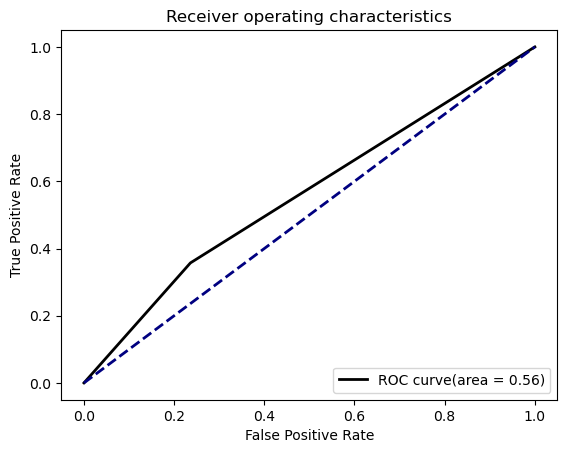

In [39]:
plt.figure()
plt.plot(fpr, tpr, color = 'black', lw = 2, label = f'ROC curve(area = {round(roc_auc_score(test_labels, predictions), 2)})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc = 'lower right')
plt.show()

## K-Fold Cross Validation

In [40]:
df_train.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker
131,1,36,1,4,6887,2,1,4,3,2,3,0,29,2,1,1,1,1,1,1
203,1,12,4,9,902,2,2,4,2,2,4,0,21,1,2,1,1,1,0,1
50,0,24,1,5,2333,4,0,4,3,2,2,0,29,0,1,1,3,1,0,1
585,1,18,4,5,2039,2,1,1,1,2,4,2,20,0,2,1,1,1,0,1
138,0,15,0,7,2728,4,2,4,3,1,2,2,35,0,1,3,1,1,1,1


In [41]:
df_train.reset_index(drop = True, inplace = True)
train_labels.reset_index(drop = True, inplace = True)

In [49]:
cv = KFold(n_splits = 9, random_state = 42, shuffle = True)

In [50]:
df_train.index

RangeIndex(start=0, stop=900, step=1)

In [55]:
scores = []
cv_model = DecisionTreeClassifier(criterion = 'entropy')

for i, index in enumerate(cv.split(df_train)):
    train_index = index[0]
    test_index = index[1]
    
    print('Train Index :', train_index, "\n")
    print('Test Index :', test_index, "\n")
    
    x_train = df_train.loc[train_index]
    x_test = df_train.loc[test_index]
    y_train = train_labels[train_index]
    y_test = train_labels[test_index]
    
    cv_model.fit(x_train, y_train)
    scores.append(cv_model.score(x_test, y_test))
    #precision_score(y_test, cv_model.predict(x_test))
    joblib.dump(cv_model, f'models/DTmodel_{i}.joblib')

Train Index : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  61  62  64  65  68  69  71  73  74  75  77  78  79  80  81  82
  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118 119 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 197 199 200
 201 202 203 204 205 206 207 210 212 214 216 217 219 220 221 222 223 224
 225 226 227 228 229 230 232 233 234 235 236 237 238 240 241 242 243 244
 245 246 248 249 250 251 252 253 254 255 256 257 258 259 261 262 263 264
 265 266 267 268 269 270 271 272 273 

In [56]:
scores

[0.76, 0.65, 0.67, 0.71, 0.69, 0.68, 0.67, 0.67, 0.66]

In [57]:
model = joblib.load('models/DTmodel_0.joblib')

In [58]:
predictions = model.predict(df_test)
accuracy_score(test_labels, predictions)

0.71